# Malus experience 2
## Done by varying the angle of the two HWP


### Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib.util
import sys
import os
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.collections import PathCollection

from matplotlib.patches import Rectangle
from matplotlib.patches import ConnectionPatch

from scipy.optimize import curve_fit

module_name = "utils_v2"
file_path = "/workspaces/TP3/utils_v2.py"

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = module
spec.loader.exec_module(module)

# Importer le module
import utils_v2 as u

import pandas as pd

### Importing Data


In [2]:
degs = np.array([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])

#datas will contain in the first sublist the degrees, in the second the delays and in the third the counts

datas = [[],[],[]]
for deg in degs :
    data = pd.read_csv("/workspaces/TP3/TP_Intrication-Quantique/Datas/Malus 2/spectrum_{}deg_bin500ps.csv".format(deg), sep=";",header=0)
    
    delays = np.concatenate([-data.iloc[:,0].to_numpy()[::-1],data.iloc[:,0].to_numpy()]) 
    counts = np.concatenate([data.iloc[:,1].to_numpy()[::-1],data.iloc[:,2].to_numpy()])
    
    datas[0].append(deg)
    datas[1].append(delays)
    datas[2].append(counts)
    


### Process an plot the data

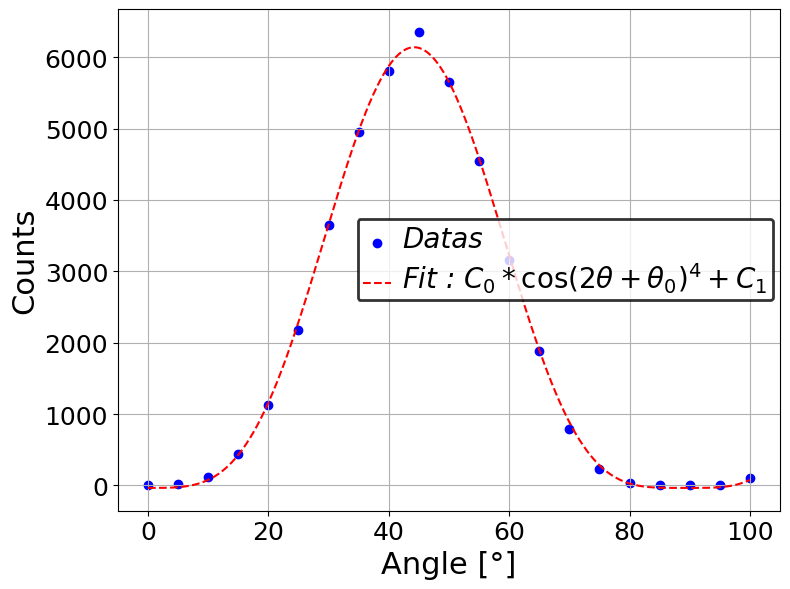

In [4]:
#get the max of the counts for each degrees
max_counts = np.zeros(len(degs))
for i in range(len(degs)):
    max_counts[i] = np.max(datas[2][i])

#plot the datas
xlabel = "Angle [°]"
ylabel = "Counts"

ax,fig = u.create_figure_and_apply_format((8,6),xlabel=xlabel, ylabel=ylabel)

ax.scatter(degs,max_counts,label="Datas",color="blue")

#fit the datas with malus's law
def malus_law(x,A,B,theta0):
    return A*np.cos(2*x+theta0)**4 + B

popt, pcov = curve_fit(malus_law, np.radians(degs), max_counts)

degs_fit = np.linspace(0,100,1000)
ax.plot(degs_fit,malus_law(np.radians(degs_fit),*popt),label=r"Fit : $C_0*\cos(2\theta + \theta_0)^4 + C_1$",color="red",linestyle="--")
        

u.set_legend_properties(ax)
plt.show()

fig.savefig("/workspaces/TP3/TP_Intrication-Quantique/Rapport/Figures/Malus_HWP2_both_nul.png")



